Visualize MNIST with PCA
---

Exercise - Load data
---

> **Exercise**: Load the ten thousand images and their labels from `mnist-10k.npz`.

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# Load data
with np.load('04 Exercise PCA/mnist-10k.npz', allow_pickle=False) as npzfile:
    # Load the arrays in a Python dictionary
    data = dict(npzfile.items())
    
X = np.array(data['data'], dtype=np.float64)
y = data['labels']

Exercise - Visualize digits on a 2d plot
---

> **Exercise**: Compute the first two principal components using all the images and then plot a subset of the database using them, e.g., 500 images.

In [24]:
# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None); # Unsupervised learning, no y variable

# Compute component scores of 500 images
digits_components = pca.transform(X[:500])
digits_labels = y[:500]

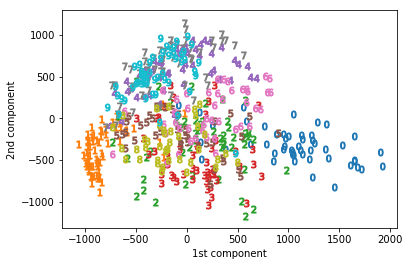

In [28]:
# Group images by digit
for label in range(10):
    # Images of this digit
    idx = (digits_labels == label)
    plt.scatter(digits_components[idx, 0], digits_components[idx, 1],
               marker="${}$".format(label),
               s=50)
    
# Labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [29]:
pve = pca.explained_variance_ratio_
pve_cumsum = np.cumsum(pve)
pve_cumsum
# Prints: array([0.10200027, 0.17415466])

array([0.10200027, 0.17415466])

In this exercise, we start with 784-element arrays, each representing an image. The values in each array correspond to pixel brightness on a 0-255 scale (black to white). Another way to think of this is that each image is a "point" in 784-dimensional space, where the space dimensions correspond to the pixels.

Now, we would like to plot these "points" (aka the images) in space. This would help to reveal correlations between images, clusters of images, outliers, etc. However, we can't plot 784-dim arrays as we can only plot in 2 and 3 dimensions. Hence, we need to find another way!

In this exercise, we used PCA, a common technique for performing dimensionality reduction. Some applications of PCA are visualization and data compression. PCA uses linear algebra and finds the directions of maximum variance in the data - i.e., the directions where the features are mostly correlated (under the hood, this is done by computing the covariance matrix of the features). These directions of maximum variance are called principal components (or eigenvectors) and are sorted in terms of importance. So, we know that, by construction, the first principal components will be the ones that explain most of the variance in the data.

Another way to think of this is that now we have constructed a new space - the "PCA-space", where the directions are the principal components (i.e., the most important directions). Using the following code snippet, we know that, in this dataset, the first two principal components capture ~17,4% of the variance in the data.

Once we determine the principal components, we project the data points (the images) onto them.

So far, we have managed to condense some of the information from the original 784-dimensional space into 2 dimensions. If you check the solution notebook, we color-coded the data points according to their class (0s, 1s, 2s, …). We can see that, even if we used only 2 principal components, some of the digits (e.g., the 0s, the 1s) are well separated from the rest!

Remember, PCA is an unsupervised learning, so we don't take the labels into account for computing the principal components. PCA only looks at the correlations between the features. However, PCA has found a 2-dimensional representation of the original data points, separating 0s and 1s from the rest. For the other digits, we need to consider more principal components to our analysis.

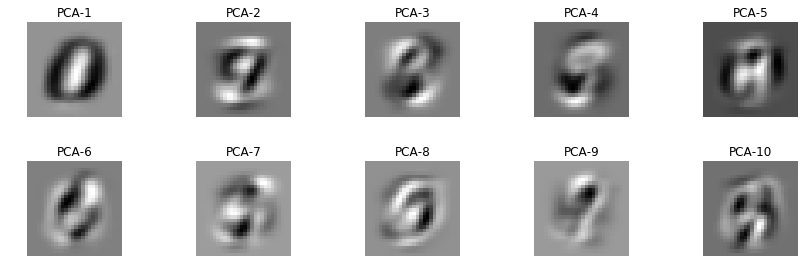

In [30]:
pca = PCA(n_components=10)
pca.fit(X, y=None);

fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(12,2*2))

for i,ax in enumerate(axes.ravel()):

    principal = pca.components_[i].reshape(28,28)
    ax.imshow(principal, cmap=plt.cm.gray_r)
    ax.set_title('PCA-'+str(i+1))
    ax.axis('off')

plt.tight_layout()

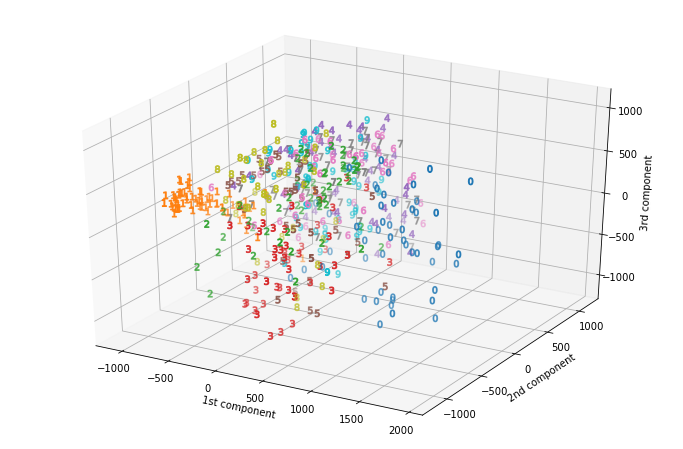

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Compute first three principal components
pca3d = PCA(n_components=3)
pca3d.fit(X)

# Plot a subset of the points
N = 500
digits_components3d = pca3d.transform(X[:N])
digits_label3d = y[:N]

# Create 3d plot with Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Group images by digit
for label in range(10): # 0,1,2,3..9
    # Images of this digit
    idx = (digits_label3d == label)

    # Plot images
    ax.scatter3D(
        digits_components3d[idx, 0], digits_components3d[idx, 1], digits_components3d[idx, 2],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=50 # Size of each marker
    )

# Add legend and labels
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
plt.show()